In [34]:
import numpy as np 
import matplotlib.pyplot as plt
from evolve import Simulation, calculate_acceleration
from Particle import Particles
from visualization import load_files,save_movie
from numba import njit,prange,set_num_threads,jit

set_num_threads(8)

N=10000
bound=1000
particle=Particles(N)
np.random.seed(509)
pos=np.random.rand(N,2)*2*bound-bound
vel=np.random.rand(N,2)*bound/5-bound/10
particle.positions=pos
particle.velocities=vel
#mass=np.random.rand(N,1)*10+1
mass = np.ones((N,1))*1
particle.masses=mass
particle.accelerations=np.zeros((N,2))
#plt.plot(pos[:,0],pos[:,1],'o')
header="vel_bd_80"
sim=Simulation(particle)
sim.setup(bound=bound,bound_vel_up=80, N=5,b0=0.01,b1=0,method="RK2",r_soft=10, radius=0)
sim.evolve(0.01,20,io_freq=10,io_header=header)

In [35]:
# pressure theortical evolution
def pressure_theortical(fns, N, m, bound, vel_in, bound_vel_up, dt=0.1):

    gamma = 5/3
    # calculate the average velocity
    v_averg = np.mean(2*np.mean(vel**2, axis=1))

    # set the volume
    V = np.zeros(len(fns))
    V[0] = (2*bound)**2

    P = np.zeros(len(fns))
    P[0] = (v_averg**2)*N*m/2/V[0]

    for i in range(1, len(fns)):
        V[i] = V[i-1]-bound_vel_up*dt*2*bound
        P[i] = P[0]*(V[0]/V[i])**(gamma)
    return V, P

In [36]:
def plot_avg_vel(fns):
    velocities=np.zeros((len(fns),3))
    xx=np.zeros((len(fns),5))
    t=np.arange((len(fns)))*0.1
    xx=np.zeros((len(fns),25))
    xx1=np.zeros((len(fns),25))
    xx2=np.zeros((len(fns),25))
    xx3=np.zeros((len(fns),25))
    for i in range(len(fns)):
        tag,m,x,y,vx,vy,ax,ay=np.loadtxt(fns[i], unpack=True)
        velocities[i,0]=np.mean(np.sqrt(vx**2))
        velocities[i,1]=np.mean(np.sqrt(vy**2))
        velocities[i,2]=np.mean(np.sqrt(vx**2+vy**2))
        xx[i,:]=x[25:50]
        xx1[i,:]=x[0:25]
        xx2[i,:]=x[50:75]
        xx3[i,:]=x[75:100]
    # plt.plot(t,velocities[:,0],label='x')
    # plt.plot(t,velocities[:,1],label='y')
    # plt.xlabel('time')
    # plt.ylabel('velocity')
    # plt.title(f'average velocity of the particles of {N} particles')
    #plt.savefig(f'average velocity along each direction with {N} particles', dpi=300)
    #######################################################
    # plt.subplots()
    # plt.plot(t,velocities[:,2],label='total')
    # plt.legend()
    # plt.xlabel('time')
    # plt.ylabel('velocity')
    # plt.title(f'average velocity of {N} particles')
    # #plt.savefig(f'average velocity of {N} particles', dpi=300)
    # #######################################################
    # plt.subplots()
    # plt.plot(t,xx)
    # #######################################################
    # plt.subplots()
    # plt.plot(t,xx1)
    # #######################################################
    # plt.subplots()
    # plt.plot(t,xx2)
    # #######################################################
    # plt.subplots()
    # plt.plot(t,xx3)
    # #######################################################

def plot_pressure(fns):
    t=np.arange((len(fns)))*0.1
    p_up = np.zeros(len(fns))
    p_down = np.zeros(len(fns))
    p_left = np.zeros(len(fns))
    p_right = np.zeros(len(fns))
    p_avg = np.zeros(len(fns))
    for i in range(len(fns)):
        p_up[i], p_down[i], p_left[i], p_right[i] = np.loadtxt(fns[i], unpack=True)
        p_avg[i] = np.mean([p_up[i], p_down[i], p_left[i], p_right[i]])
    # plt.plot(t, p_up)
    # plt.xlabel('time')
    # plt.ylabel('pressure')
    # plt.title(f'pressure at top with {N} particles')
    # #plt.savefig(f'pressure at top with {N} particles', dpi=300)
    # plt.subplots()
    # plt.plot(t, p_down)
    # plt.xlabel('time')
    # plt.ylabel('pressure')
    # plt.title(f'pressure at bottom with {N} particles')
    # #plt.savefig(f'pressure at bottom with {N} particles', dpi=300)
    # plt.subplots()
    # plt.plot(t, p_left)
    # plt.xlabel('time')
    # plt.ylabel('pressure')
    # plt.title(f'pressure at left side with {N} particles')
    # #plt.savefig(f'pressure at left side with {N} particles', dpi=300)
    # plt.subplots()
    # plt.plot(t, p_right)
    # plt.xlabel('time')
    # plt.ylabel('pressure')
    # plt.title(f'pressure at right side with {N} particles')
    # #plt.savefig(f'pressure at right side with {N} particles', dpi=300)
    # plt.subplots()

    
    dt = 0.1
    m = 1
    N =10000
    V, P = pressure_theortical(fns, N, 1, bound, vel , 80, dt)
    t = np.arange(len(fns))*dt
    plt.plot(t, P/500000, label='theortical')
    plt.plot(t, p_avg, label='simulation')
    plt.legend()
    plt.xlabel('time')
    plt.ylabel('pressure')
    plt.title(f'average pressure with {N} particles')
    plt.savefig(f'average pressure with {N} particles', dpi=300)

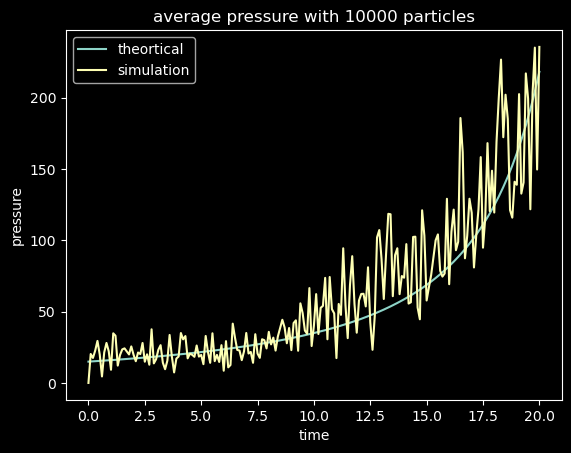

In [37]:
fns_2=load_files(header, 'pressure')
plot_pressure(fns_2)

In [38]:
# fns_1=load_files(header, 'particles')
# plot_avg_vel(fns_1)
# filename=header+".gif"
# save_movie(fns_1, lengthscale=bound, filename=filename,fps=30)